### Sendy Logistics Prediction model
<strong>Goal:</strong> Use data from Sendy Logistics to create a delivery times prediction model for different orders made through the platform


In [1]:
# Load modules
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
# Import the dataset
trainData = pd.read_csv("Data/Train.csv")
testData = pd.read_csv("Data/Test.csv")
ridersData = pd.read_csv("Data/Riders.csv")

### Data Overview

In [3]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [4]:
trainData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [5]:
ridersData.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


#### Summary stats

In [6]:
#summary overview
trainData.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [7]:
testData.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


### Plot Lat,Long Distributions of pickup and delivery

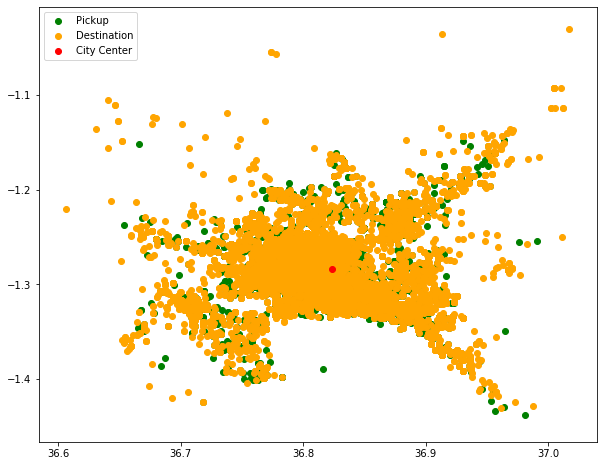

In [8]:
fig,ax=plt.subplots(figsize=(10,8))
plt.scatter(trainData['Pickup Long'],trainData['Pickup Lat'],c="green",label='Pickup')
plt.scatter(trainData['Destination Long'],trainData['Destination Lat'],c='orange',label='Destination')
plt.scatter(36.823062,-1.283200,c='red',label='City Center')
plt.legend()
plt.show()

Most of the orders are picked up and dropped around the city center

### Are there any days with high order volumes?

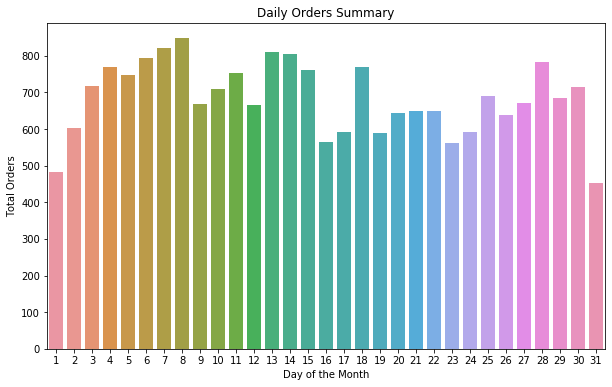

In [9]:
fig,ax=plt.subplots(figsize=(10,6))
monthOrders = trainData.groupby(['Placement - Day of Month'])['Order No'].count().reset_index()
sns.barplot('Placement - Day of Month','Order No',data=monthOrders,ax=ax)
plt.ylabel("Total Orders")
plt.title("Daily Orders Summary")
plt.xlabel("Day of the Month")
plt.show()

### Sumary on type of order, vehicle and platform used

In [10]:
summaryDistribution=trainData.groupby(['Personal or Business','Vehicle Type','Platform Type'])['Order No'].count().reset_index()
summaryDistribution.columns =['Personal or Business','Vehicle Type','Platform Type','Total Orders']
summaryDistribution

,Personal or Business,Vehicle Type,Platform Type,Total Orders
0,Business,Bike,1,317
1,Business,Bike,2,63
2,Business,Bike,3,16984
3,Business,Bike,4,20
4,Personal,Bike,1,1830
5,Personal,Bike,2,917
6,Personal,Bike,3,1070


Platform 3 is the most popular platform

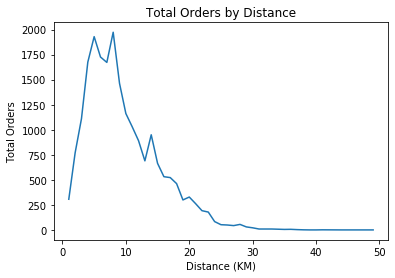

In [11]:
DistanceDist = trainData.groupby(['Distance (KM)'])['Order No'].count().reset_index().sort_values(by='Order No',ascending=False)
sns.lineplot('Distance (KM)','Order No',data=DistanceDist)
plt.title('Total Orders by Distance')
plt.ylabel("Total Orders")
plt.show()

Majority of the orders were delivered within 10km of their of pickup location

In [12]:
# how does the riders dataset look like?
ridersData.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


### Merge Training Data with the Riders Data

In [13]:
def mergeData_with_RidersId(data,riders):
    merged_data = pd.merge(data,riders,on='Rider Id')
    return merged_data

In [14]:
trainData_Merged_with_Riders = mergeData_with_RidersId(trainData,ridersData)
trainData_Merged_with_Riders.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


#### Looks like some riders were not rated. Lets take a quick look at their data

In [15]:
riders_with_zero_Rating = trainData_Merged_with_Riders[trainData_Merged_with_Riders['Average_Rating']==0]
riders_with_zero_Rating.shape

(53, 33)

In [16]:
riders_with_zero_Rating.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
18983,Order_No_13565,User_Id_1329,Bike,3,Business,15,5,10:45:51 AM,15,5,...,-1.273056,36.811298,-1.299148,36.804345,Rider_Id_657,1634,18,308,0.0,0
18984,Order_No_4749,User_Id_1724,Bike,3,Business,8,5,1:43:19 PM,8,5,...,-1.259382,36.807205,-1.255189,36.782203,Rider_Id_657,1864,18,308,0.0,0
18985,Order_No_14644,User_Id_1207,Bike,3,Business,2,6,1:49:15 PM,2,6,...,-1.262967,36.806837,-1.207546,36.791398,Rider_Id_657,1951,18,308,0.0,0


### Baseline Model Test

## Feature Selection
#### 1. Use correlation Matrix
How do the features in our dataset correlate with the duration from pickup to delivery?<br>
We then select those features that are highly correlated with our target variable

#### Data Encoding
Assign 0s and 1s to categorical features in the dataset

In [17]:
# Drop columns with high cardinality
# Pickup & Arrival times might be useful in the dataset, but exclude for now
trainData_Drop_Columns= trainData_Merged_with_Riders.drop(['Order No','User Id', 'Vehicle Type',
                                             'Rider Id','Arrival at Destination - Time',
                                             'Pickup - Time','Arrival at Pickup - Time',
                                             'Confirmation - Time','Placement - Time'],axis=1)

# perfrom one-hot-encoding in the dataset,
# set drop-first to avoid multi-colinearity
trainData_Drop_Columns = pd.get_dummies(trainData_Drop_Columns,drop_first=True)

In [18]:
trainData_Drop_Columns.head(3)

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal or Business_Personal
0,3,9,5,9,5,9,5,9,5,9,...,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,0
1,3,18,5,18,5,18,5,18,5,18,...,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549,1
2,3,31,5,31,5,31,5,31,5,31,...,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549,0


In [19]:
# Re-order columns
# so that the target variable is at the end of the dataframe
trainData_Drop_Columns =trainData_Drop_Columns[['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long',
        'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Personal or Business_Personal','Time from Pickup to Arrival']]

In [20]:
# Impute missing rainfall data
trainData_Drop_Columns['Precipitation in millimeters'] = trainData_Drop_Columns['Precipitation in millimeters'].fillna(
    trainData_Drop_Columns['Precipitation in millimeters'].mean())


In [21]:
trainData_Drop_Columns.head(3)

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal or Business_Personal,Time from Pickup to Arrival
0,3,9,5,9,5,9,5,9,5,9,...,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549,0,745
1,3,18,5,18,5,18,5,18,5,18,...,-1.326774,36.787807,-1.356237,36.904295,1637,1309,13.8,549,1,2886
2,3,31,5,31,5,31,5,31,5,31,...,-1.255189,36.782203,-1.273412,36.818206,1637,1309,13.8,549,0,2615


### Correlation Matrix

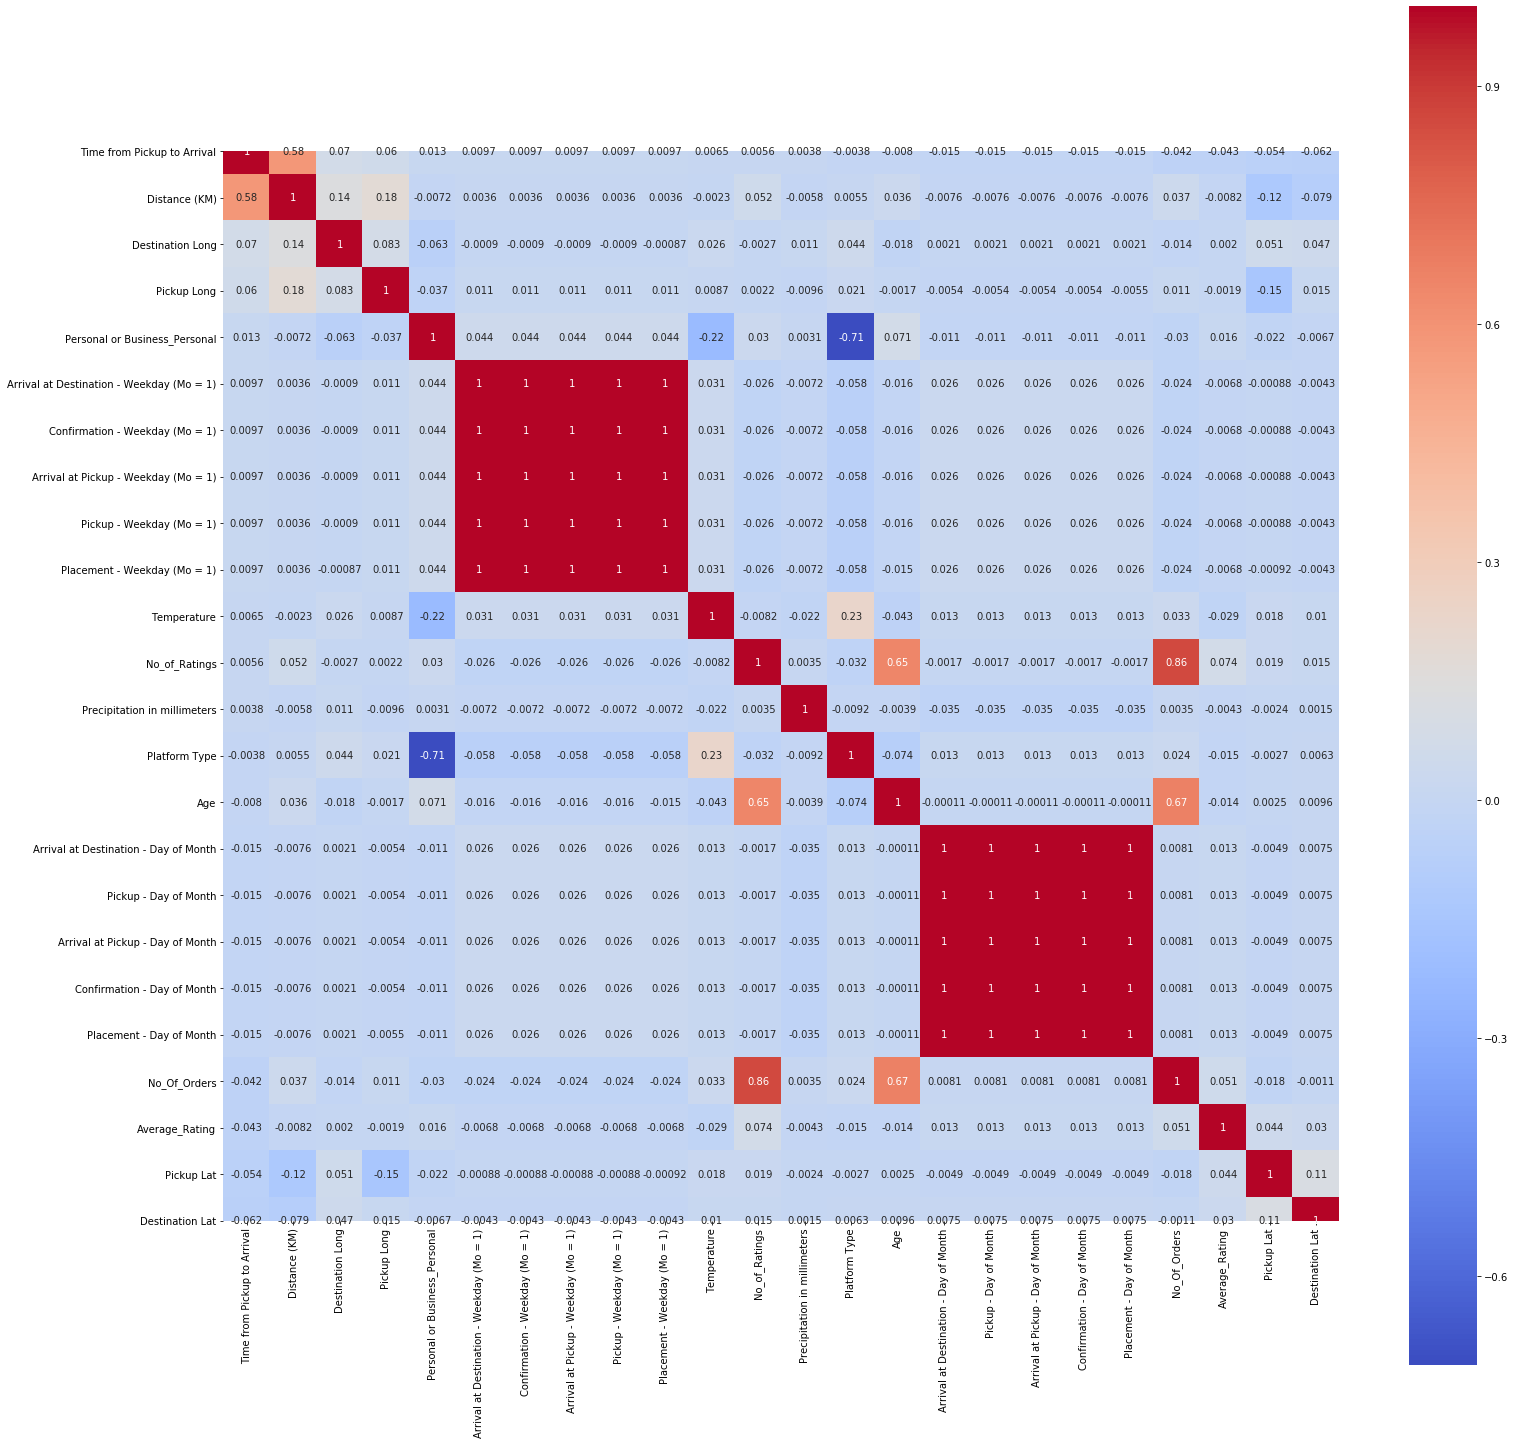

In [23]:
# define correlation values
corr_matrix = trainData_Drop_Columns.corr()
corr_matrix = corr_matrix.sort_values('Time from Pickup to Arrival',ascending=False)

#get orderd list of matrix features
corr_features = corr_matrix.index


# plot correlation matrix
fig,ax=plt.subplots(figsize=(25,25))
#plot heat map
sns.heatmap(trainData_Drop_Columns[corr_features].corr(),
              annot=True,cmap="coolwarm",square=True,ax=ax)

#save file for easy zoom
plt.savefig("corr_matrix.pdf")
plt.show()

##### Delivery time is highly correlated with distance and least with the platform used.

In [24]:
# select top 10 features for modelling
selected_features = ['Distance (KM)', 'Destination Long','Pickup Long',
     'Precipitation in millimeters','Personal or Business_Personal',
     'No_Of_Orders','Average_Rating', 'Pickup Lat', 'Destination Lat','Placement - Day of Month']

In [25]:
# split the data into train features and target variable
y = trainData_Drop_Columns['Time from Pickup to Arrival']
X = trainData_Drop_Columns[selected_features]

### Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Create and Train the Model

In [27]:
lm =LinearRegression()
model = lm.fit(X_train,y_train)

### Predictions 

In [28]:
prediction = model.predict(X_test)

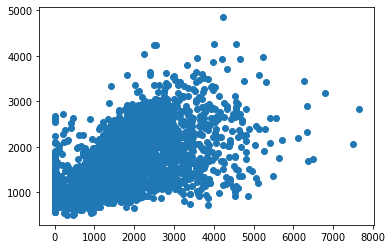

In [29]:
# Visualize prediction
plt.scatter(y_test,prediction)
plt.show()